# Moneyball

### Presentar Datasets

In [1]:
import pandas as pd

In [2]:
salarios = pd.read_csv('salarios_pjg.csv')
salarios.head()

,teamID,PJG,Salario_prom
0,KCA,46.52,1470645.59
1,MIN,48.98,1662150.06
2,CLE,49.87,1648258.28
3,CHA,50.67,2146572.04
4,DET,47.80,2306922.91


In [3]:
estadistica = pd.read_csv("moneyball.csv")
estadistica.head()

,Equipo,Liga,Año,CF,CC,JG,PBase,SLG,PBat,Playoffs,RankSeason,RankPlayoffs,Juegos,OPBase,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


### Explicación de columnas

**CF**: Carreras a Favor

**CC**: Carreras en Contra

**JG**: Juegos Ganados

**PBase**: Porcentaje en que los jugadores llega a Base

**SLG**: Productividad del bateador, diferente importancia a cada resultado del bateo(1 base, 2 bases, hit, carrera, etc.)

**PBat**: Porcentaje de Bateo

**OPBase**: Porcentahe en que un Oponente llega a Base

**OSLG**: Productividad de bateo del Oponente

**RankSeason**: Rank de la liga.

**RankPlayoffs**: Rank de playoffs.

**Playoffs**: Pasaron o no a los playoffs

**Juegos**: Juegos jugados.


### Cuantos juegos ganados se necesitan para llegar a Playoffs?

La meta de un equipo de baseball es llegar a los playoffs y para llegar se tienen que ganar juegos.

Lo primero que DePodesta hizo fue poner la meta en términos numéricos, cuántos juegos necesitamos ganar para pasar a los playoffs?

Contestó esa pregunta generando una gráfica usando las estadísticas disponibles en el 2001.

In [4]:
estadistica['Año'].unique()

array([2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1993, 1992, 1991, 1990, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1971, 1970, 1969, 1968, 1967, 1966, 1965,
       1964, 1963, 1962])

Pero queremos recrear la situación en la que estaban los atléticos en ese momento,
entonces agarremos datos hasta el 2001.

In [5]:
# Usemos los datos que tenían disponible (1962-2001)
moneyball = estadistica[estadistica['Año']<2002]
moneyball.reset_index(inplace=True, drop=True)

Generemos la gráfico que usó Depodesta.

In [6]:
losers = moneyball[moneyball['Playoffs']==0][['JG','CF']]
winners = moneyball[moneyball['Playoffs']==1][['JG','CF']]

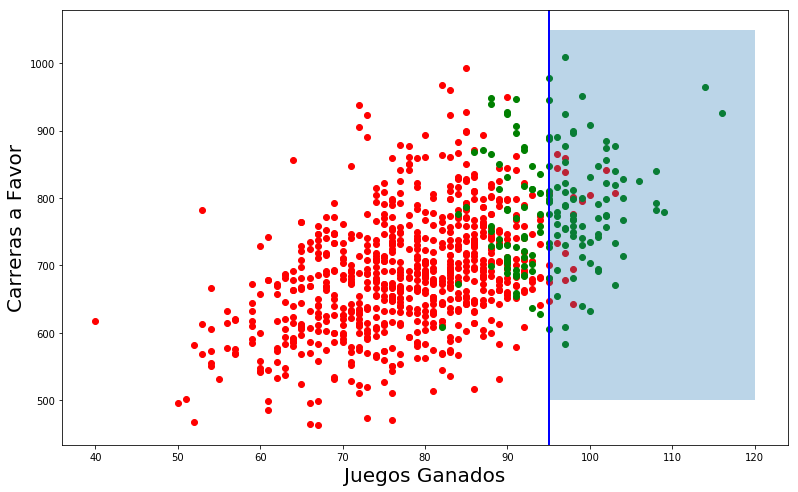

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13,8))
plt.scatter(x=losers['JG'], y=losers['CF'], c="red")
plt.scatter(x=winners['JG'], y=winners['CF'], c="green")
plt.xlabel("Juegos Ganados", fontsize=20)
plt.ylabel("Carreras a Favor", fontsize=20)
# juegos a ganar
plt.axvline(x=95, linewidth=2, color='blue',  alpha=1)
# carreras a favor
# plt.axhline(y=814, xmax=120, color='blue', linewidth=2)
# equipos dentro de estos parámetros
plt.fill_betweenx(y=np.linspace(500,1050,236), x1=np.repeat(95,236), x2=np.repeat(120,236), alpha=.3)
plt.show()

Se puede observar que los equipos que ganan más de 95 juegos tienen una buena probabilidad de pasar a los playoffs, una cantidad menor y esa probabilidad disminuye considerablemente.

Por lo tanto ya tenemos una meta tangible, necesitamos al menos 95 juegos.

### Juegos Ganados en promedio por los Atléticos

Cuál es el promedio de juegos ganados de los Atléticos?

In [9]:
moneyball[moneyball['Equipo']=='OAK']['JG'].mean()

83.4

## Regresión con Payroll

Los atléticos en ese entonces tenían un promedio de 83.4 juegos ganados durante la liga, por lo tanto debemos hacer algo para aumentar ese número.

Con esto en mente revisemos primero la estrategia más usada, subir los salarios y contratar jugadores “talentosos”: 

Podemos utilizar una Regresión lineal con el % de juegos ganados y el presupuesto del equipo.

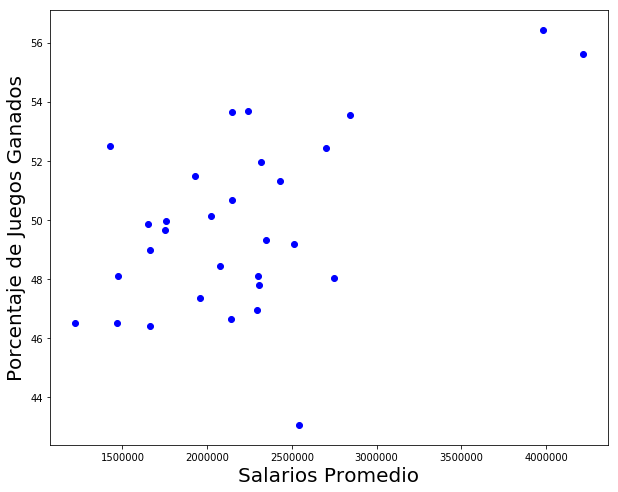

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(x=salarios['Salario_prom'], y=salarios['PJG'], c="blue")
plt.xlabel("Salarios Promedio", fontsize=20)
plt.ylabel("Porcentaje de Juegos Ganados", fontsize=20)
plt.show()

Ok, a simple vista se ve una ligera tendencia, aunque hay ciertos puntos que contradicen esta hipótesis.

Calculemos la regresión y veamos los resultados.

Vamos a utilizar una librería llamada scikit-learn que tiene código abierto de casi cualquier modelo de machine learning que puedan necesitar, entre ellos Regresión Lineal.

In [11]:
from sklearn.linear_model import LinearRegression

ind = salarios['Salario_prom'].values.reshape(-1,1)

dep = salarios['PJG'].values

Payroll_reg = LinearRegression()
Payroll_reg.fit(ind, dep)

print('m = ', Payroll_reg.coef_)
print('b = ', Payroll_reg.intercept_)

m =  [2.45432193e-06]
b =  44.38765532444737


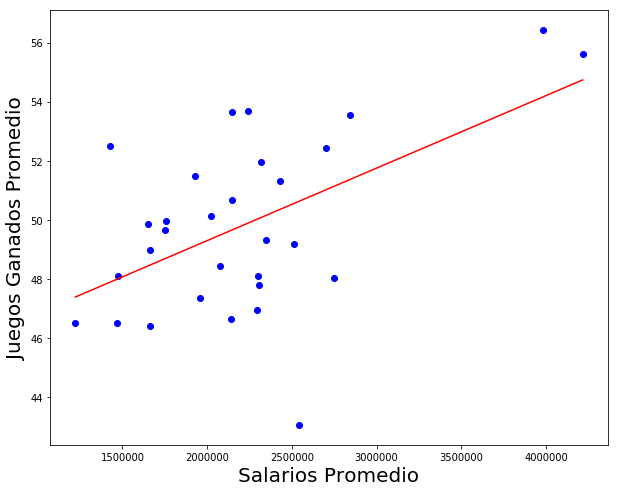

In [12]:
from matplotlib import lines

test = np.linspace(1221698,4216198, num=30)
x_test = test[:, np.newaxis]
pred = Payroll_reg.predict(x_test)

bfl = lines.Line2D(x_test, pred, color='red')
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(x=salarios['Salario_prom'], y=salarios['PJG'], c="blue")
plt.xlabel("Salarios Promedio", fontsize=20)
plt.ylabel("Juegos Ganados Promedio", fontsize=20)
ax.add_line(bfl)
plt.show()

### Calculamos R² y determinamos qué tan bueno es el modelo. ***

Necesitamos una métrica para saber que tan bueno es nuestro modelo. 

Para eso usamos el coeficiente de determinación R².

R² calcula que tan relacionado está nuestro modelo con los datos o que tanto nuestros datos son explicados por nuestro modelo.

La forma en que se hace es comparando los resultados con la media, básicamente estamos diciendo: si tu modelo es peor para predecir que la media de los datos, tu modelo es muy malo. 

El valor es 0 si es igual de bueno para predecir que la media, usa números negativos para indicar que es peor y números positivos para indicar que es mejor, el valor máximo es 1.

Por lo tanto queremos que nuestro coeficiente sea lo más cercano a 1.

In [13]:
print('R² = ', Payroll_reg.score(ind, dep))

R² =  0.28713334757728814


Este resultado nos dice que el presupuesto de un equipo si influye en los juegos ganados, pero no de manera contundente. Lo cuál es algo contraintuitivo!

Esta estrategia no parece ser la mejor opción y no había presupuesto para ir por esa de todas formas.


## Regresión con Diferencia de Carreras

¿Qué otra estrategia podemos tomar?
¿Qué variables se les ocurre que puedan tener un efecto en el número de juegos ganados?

DePodesta sugirió analizar la diferencia de carreras a favor y carreras en contra.

Y tiene sentido, tener muchas carreras a favor no es necesariamente un buen indicador de juegos ganados, así como sólo carreras en contra no nos dice que el un equipo pierde mucho, es la diferencia lo que nos da una mejor idea de cómo le va al equipo.

Veamos cómo nos va con esta variable:

### Columna extra: Diferencia entre CF y CC (DC)

In [14]:
# extra columna DC
# moneyball['DC']=moneyball.apply(lambda x: x['CF']-x['CC'], axis=1)
moneyball['DC'] = moneyball['CF'] - moneyball['CC']
moneyball.head()

/home/jorge/Envs/dv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Equipo,Liga,Año,CF,CC,JG,PBase,SLG,PBat,Playoffs,RankSeason,RankPlayoffs,Juegos,OPBase,OSLG,DC
0,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
1,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
2,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
3,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
4,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


In [15]:
ind = moneyball['DC'].values.reshape(-1,1)
dep = moneyball['JG'].values

JG_reg = LinearRegression()
JG_reg.fit(ind, dep)

print('m = ', JG_reg.coef_)
print('b = ',JG_reg.intercept_)

m =  [0.10576562]
b =  80.88137472283813


In [16]:
print('R² = ', JG_reg.score(ind, dep))

R² =  0.8808103719972755


Esta parece ser una muy buena estrategia, ahora solo debemos enfocar nuestra atención en la diferencia de carreras a favor y en contra.

Sustituímos para calcular cuánto debe ser la diferencia de carreras si queremos ganar 95 juegos.

### Estimación de DC

Usamos nuestro modelo para estimar cuál es la diferencia de carreras que necesitamos para llegar a 95 juegos ganados.


y = m*x + b

95 = m*DC + b

DC = 95 - b / m

In [17]:
dc = (95 - JG_reg.intercept_)/JG_reg.coef_
print(dc)

[133.48973844]


Esto significa que para ganar al menos 95 juegos necesitamos una diferencia de carreras de al menos 133.4.

Depodesta estimo una diferencia de 135 carreras lo cual se acerca bastante a nuestra estimación.

## Regresión Lineal Múltiple

¿Cómo un equipo hace carreras?

1.- porcentaje de veces que un jugador llega a base (PBase). Como sea que eso pase, base por bola, al batear, como sea.

2.- porcentaje de bases alcanzadas por un jugador en cada batazo (SLG). Osea cada que el jugador le da a la bola le cuentas cuántas bases avanza y sacas un promedio de todas las veces que esto pasa, dándole mayor peso a las bases mas altas.

3.- Hay una variable que la mayoría de los equipos toman en cuenta: el porcentaje de veces que el jugador llega a base al betear (PBat). así que la tomaremos en cuenta también.

El siguiente análisis se llama Regresión lineal múltiple, ya que estamos comparando más de una variable con otra. 

Y podemos usar este método para encontrar qué variables son más significativas para predecir DC.


### Variables significativas

Qué variables nos hacen tener más carreras a favor?

In [18]:
ind = moneyball[['PBat','PBase','SLG']].values.reshape(-1,3)

dep = moneyball['CF'].values

CF_reg = LinearRegression()
CF_reg.fit(ind, dep)

print('m = ', CF_reg.coef_)
print('b = ',CF_reg.intercept_)
print('R² = ', CF_reg.score(ind, dep))

m =  [-368.96606009 2917.42140821 1637.92766577]
b =  -788.4570470807892
R² =  0.9302016258786281


Lo primero que podemos notar es que le coeficiente de determinación es muy bueno, tenemos un buen modelo.

Podemos ver también, que Porcentaje de Bateo tiene un coeficiente negativo, esto nos está diciendo que mientras mayor sea PBat menor es nuestra estimación de número de carreras, lo cual no tiene sentido.

#### Multicolinealidad!

Este problema es causado por algo que llamamos Multicolinealidad:
Lo que está pasando en nuestro análisis es: la variable PBat, está aportando información repetida o que ya inferimos de una de las otras dos variables por lo tanto al momento de ajustar nuestra línea el modelo debe disminuir un poco esa “opinión repetida” para tener un modelo más balanceado y eso causa el coeficiente negativo. 


#### Quitamos variable

Por lo tanto corramos el código sin usar esa variable.

In [19]:
ind = moneyball[['PBase','SLG']].values

dep = moneyball['CF'].values

CF_reg = LinearRegression()
CF_reg.fit(ind, dep)

print('m = ', CF_reg.coef_)
print('b = ',CF_reg.intercept_)
print('R² = ', CF_reg.score(ind, dep))

m =  [2737.76802227 1584.90860546]
b =  -804.6270610622398
R² =  0.9295810608096597


R2 es casi el mismo, lo que significa que podemos tener un modelo muy similar con menos variables… eficiencia.

#### Ahora para CC:

Tiene sentido utilizar el OPBase y OSLG que el equipo contrario nos hace a nosotros, tenemos estadísticas también de lo que nuestro equipo “permite que le hagan”. 

Con ellas podemos estimar las carreras que tendremos en contra.

Hay variables Nulas, que ignoraremos para hacer el análisis:

In [20]:
CCdf = moneyball[(moneyball['OPBase'].notnull()) & (moneyball['OSLG'].notnull())]

In [21]:
ind = CCdf[['OPBase','OSLG']].values

dep = CCdf['CC'].values

CC_reg = LinearRegression()
CC_reg.fit(ind, dep)

print('m = ', CC_reg.coef_)
print('b = ',CC_reg.intercept_)
print('R² = ', CC_reg.score(ind, dep))

m =  [2913.59948582 1514.28595842]
b =  -837.3778886133358
R² =  0.9073132027228664


Estos resultados concuerdan con lo que se discute en la película, PBat no aporta nada extra y nada más importante que las otras dos variables, está sobrevalorada es una variable que no importa tanto pero que se ha tomado en cuenta bastante, PBase tiene una alta magnitud, es muy importante y SLG es importante.

De esta manera Billy y DePodesta, determinaron que necesitaban jugadores que cumplieran con estas características, con esas habilidades que nadie más estaba tomando en cuenta y se hicieron de jugadores muy valiosos a un precio de ganga.

Entonces con estas variables tenemos dos modelos sólidos para predecir CF y CC.

A estos le sumamos el que hicimos para predecir JG usando la DC.


## Predicciones

### Predicciones usando Regresión

In [22]:
# estadísticas de OAK en el 2001:
# carreras a favor
PBase=0.339; SLG=0.43;  
# carreras en contra
OPBase=0.307; OSLG=0.373

Con esas variables podemos predecir cuántas carreras a favor tendrá el equipo:

In [23]:
CF_reg.predict([[PBase, SLG]])

array([804.98699884])

Cuántas en contra:

In [24]:
CC_reg.predict([[OPBase, OSLG]])

array([621.92581602])

Usando esos resultados podemos calcular la Diferencia DC:

Segun nuestros modelos el equipo tendrá:

In [25]:
DC = 804.986 - 621.925
print(DC)

183.06100000000004


Con esa diferencia podemos predecir los Juegos que ganaremos y saber si llegaremos a nuestra meta de ganar al menos 95:

In [26]:
JG_reg.predict([[DC]])

array([100.24293533])

## Comparar Resultados

Estos son los resultados del modelo de DePodesta, el nuestro y los resultados reales del equipo.

In [27]:
df = pd.DataFrame({'Variable':['Carreras a Favor', 'Carreras en Contra', 'Juegos Ganados'], 'Depodesta':['800-820', '650-670', '93-97'], 'Nuestro':['805', '622', '100'], 'Real':['800', '653', '103']})
df

,Variable,Depodesta,Nuestro,Real
0,Carreras a Favor,800-820,805,800
1,Carreras en Contra,650-670,622,653
2,Juegos Ganados,93-97,100,103


Podemos ver que DePodesta hizo muy buen trabajo, se acercó bastante a nuestros resultados.

También podemos ver que con el uso de información pública y estas técnicas de análisis podemos hacer predicciones muy cercanas a la realidad, si esto no te embriaga de poder no sé que lo hará.